In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens
from matplotlib.pyplot import *

In [2]:
pobj, qobj = {}, {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [4]:
al, n0, ml, cl, xl, kk = {}, {}, {}, {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]
        cl[ntype+q], xl[ntype+q], kk = np.loadtxt(qobj[ntype].f[q].mcls,unpack=True,usecols=(1,3,4))

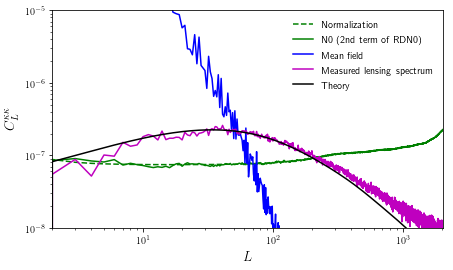

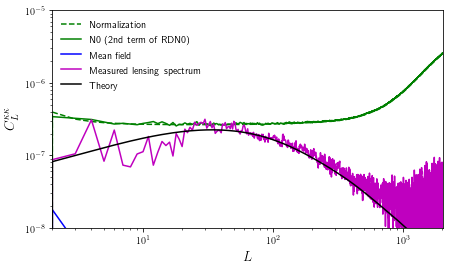

In [15]:
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
ntype = 'base'
for i, q in enumerate(['TT','EB']):
    pl.plot_1dstyle(fsize=[7,4],ylab='$C_L^{\kappa\kappa}$',usetex=True,xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5)
    plot(l,al[ntype+q],'g--',label='Normalization')
    plot(l,n0[ntype+q],'g',label='N0 (2nd term of RDN0)')
    plot(l,ml[ntype+q],'b',label='Mean field')
    #plot(l,xl[ntype+q],'m--',label='Input x Reconstructed')
    plot(l,cl[ntype+q]-n0[ntype+q],label='Measured lensing spectrum',color='m')
    plot(pobj['base'].l,pobj['base'].kk,'k',label='Theory')
    legend()
    savefig('fig_lens_aps_'+q+'.pdf')
    show()